Build a regression model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_features = pd.read_csv("../data/features.csv")
df_features

correlation_matrix = df_features.corr(numeric_only=True)
correlation_matrix

y = df_features['Number of Bikes']
X = df_features[['Average_popularity_F','Average_rating_Y','Average_review_count_Y']]
X = sm.add_constant(X) 
X.head()

model = sm.OLS(y, X)
results = model.fit()

Provide model output and an interpretation of the results. 

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.397
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.246
Time:                        20:57:11   Log-Likelihood:                -523.79
No. Observations:                 160   AIC:                             1056.
Df Residuals:                     156   BIC:                             1068.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

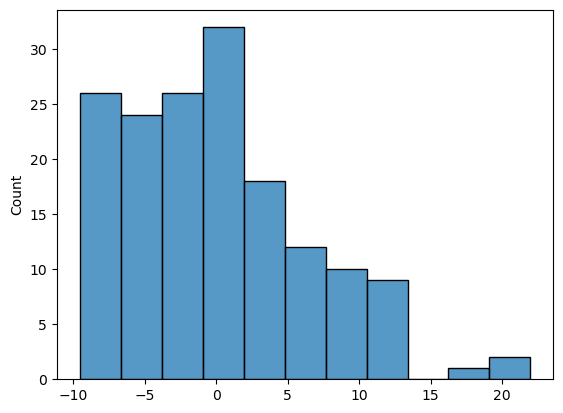

8.97245592212692

In [2]:
print(results.summary())

# Interpretation Summary

# Overall, the model suggests that the characteristics of the POIs do not have a statistically significant impact on the estimated Number of bikes for a given station. 

# The Adj. R-squared indicating the goodness of fit of the model shows that around 0.7% of the variability in Number of bikes can be explained by the independent variables.

residuals = results.resid

sns.histplot(residuals)
plt.show()

# To extract the co-efficients
results.params

# The model equation for prediction is: number_of_bikes = b0 + b1*known_popularity + b3*known_rating_Y + b4*known_review_count_Y

b0 = results.params['const']
b1 = results.params['Average_popularity_F']
b3 = results.params['Average_rating_Y']
b4 = results.params['Average_review_count_Y']

known_popularity = 0.9384631084658914
known_rating_Y = 4.67
known_review_count_Y = 50.32
predicted_num_bikes = b0 + b1*known_popularity + b3*known_rating_Y + b4*known_review_count_Y
predicted_num_bikes

# Removed the variable with the highest p-value (Average_dist_F with a p-value of 0.597) to get a better Adj. R-squared, even though I should be removing all the variables that have a p-value over 0.05.
# Next, I removed the 2nd variable with highest p-value (Average_distance_Y with a p-value of 0.526) to get a better Adj. R-Squared (0.4%).
# I would keep going until all the variables are statistically significant owever if I do that, then I would need to remove all variables so I just removed two variables.

# The final model has an Adj. R-Squared value of 0.7%. 
# The linear regression model is explained through the following equation:

# (Number of Bikes) = 4.88 + 18.32*(Average_popularity_F) - 3.11*(Average_rating_Y) + 0.03*(Average_review_count_Y)

# Stretch

How can you turn the regression model into a classification model?